### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load data
db = pd.read_csv(r"C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\data\diabetes_data.csv")


In [9]:
db.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [11]:
db.shape


(1879, 46)

In [14]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1879 non-null   int64  
 1   Age                            1879 non-null   int64  
 2   Gender                         1879 non-null   int64  
 3   Ethnicity                      1879 non-null   int64  
 4   SocioeconomicStatus            1879 non-null   int64  
 5   EducationLevel                 1879 non-null   int64  
 6   BMI                            1879 non-null   float64
 7   Smoking                        1879 non-null   int64  
 8   AlcoholConsumption             1879 non-null   float64
 9   PhysicalActivity               1879 non-null   float64
 10  DietQuality                    1879 non-null   float64
 11  SleepQuality                   1879 non-null   float64
 12  FamilyHistoryDiabetes          1879 non-null   i

In [22]:
db.describe(include='all')

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,4.895801,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,2.867144,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,0.000885,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,2.476802,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,4.888566,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,7.356058,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,9.998677,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


In [33]:
db.nunique()

Age                                71
Gender                              2
Ethnicity                           4
SocioeconomicStatus                 3
EducationLevel                      4
BMI                              1879
Smoking                             2
AlcoholConsumption               1879
PhysicalActivity                 1879
DietQuality                      1879
SleepQuality                     1879
FamilyHistoryDiabetes               2
GestationalDiabetes                 2
PolycysticOvarySyndrome             2
PreviousPreDiabetes                 2
Hypertension                        2
SystolicBP                         90
DiastolicBP                        60
FastingBloodSugar                1879
HbA1c                            1879
SerumCreatinine                  1879
BUNLevels                        1879
CholesterolTotal                 1879
CholesterolLDL                   1879
CholesterolHDL                   1879
CholesterolTriglycerides         1879
Antihyperten

In [18]:
# Drop non-predictive or irrelevant columns
db.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)


In [27]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1879 non-null   int64  
 1   Gender                         1879 non-null   int64  
 2   Ethnicity                      1879 non-null   int64  
 3   SocioeconomicStatus            1879 non-null   int64  
 4   EducationLevel                 1879 non-null   int64  
 5   BMI                            1879 non-null   float64
 6   Smoking                        1879 non-null   int64  
 7   AlcoholConsumption             1879 non-null   float64
 8   PhysicalActivity               1879 non-null   float64
 9   DietQuality                    1879 non-null   float64
 10  SleepQuality                   1879 non-null   float64
 11  FamilyHistoryDiabetes          1879 non-null   int64  
 12  GestationalDiabetes            1879 non-null   i

In [32]:

print(db.dtypes)

Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryDiabetes              int64
GestationalDiabetes                int64
PolycysticOvarySyndrome            int64
PreviousPreDiabetes                int64
Hypertension                       int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
CholesterolTotal                 float64
CholesterolLDL                   float64
CholesterolHDL  

In [34]:
db['Diagnosis'].value_counts(normalize=True)


0    0.599787
1    0.400213
Name: Diagnosis, dtype: float64

In [37]:
# Get numerical columns with more than 10 unique values
numerical_cols = [col for col in db.select_dtypes(include=['int64', 'float64']).columns
                  if db[col].nunique() > 10 and col != 'Diagnosis']

print(f"Continuous numerical columns ({len(numerical_cols)}):")
print(numerical_cols)



Continuous numerical columns (21):
['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'FatigueLevels', 'QualityOfLifeScore', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy']


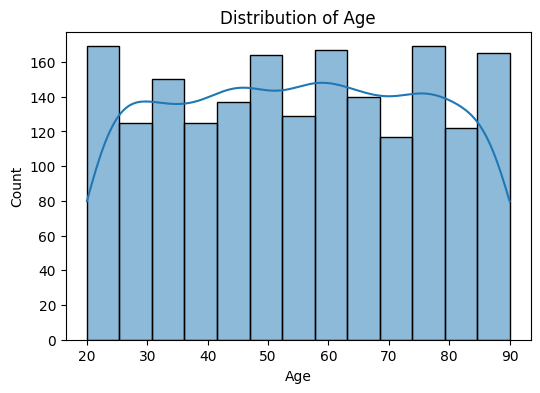

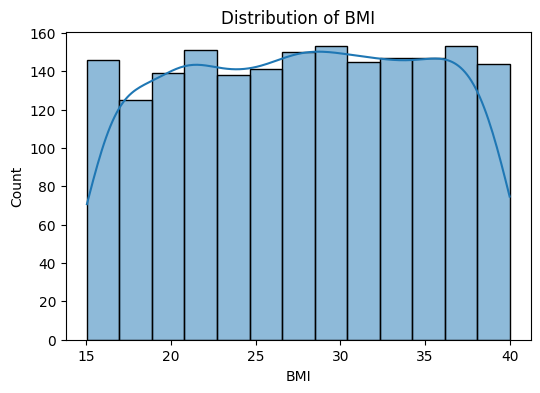

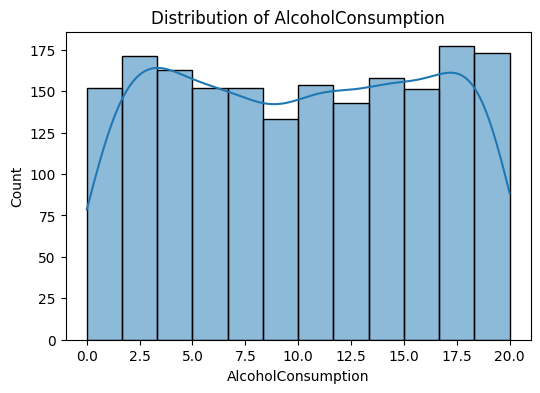

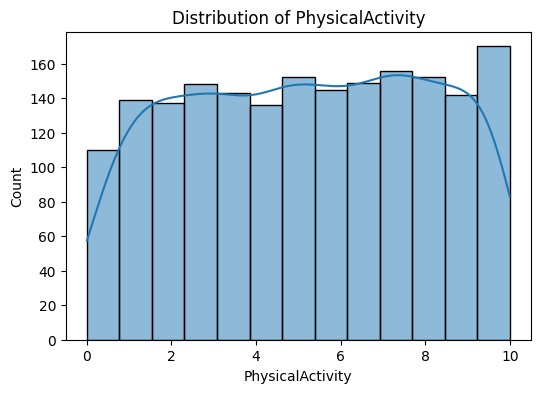

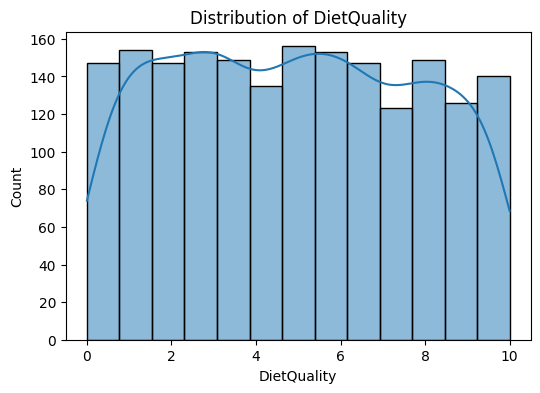

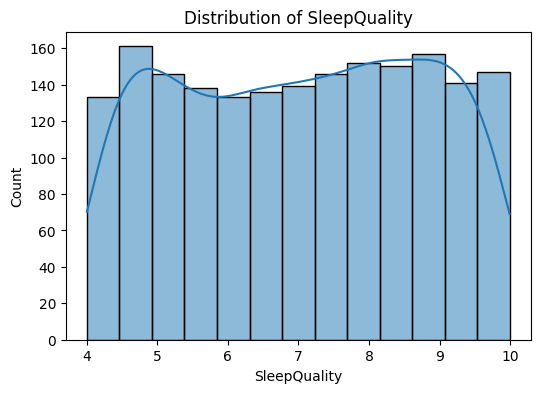

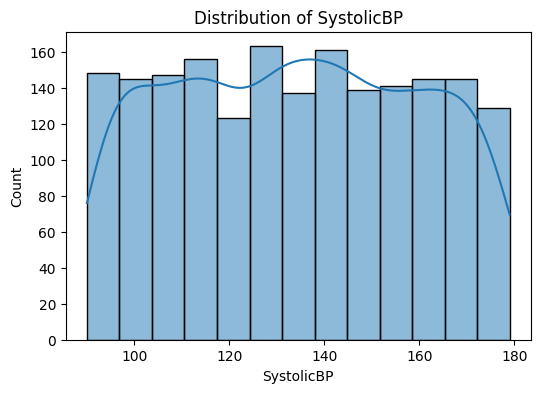

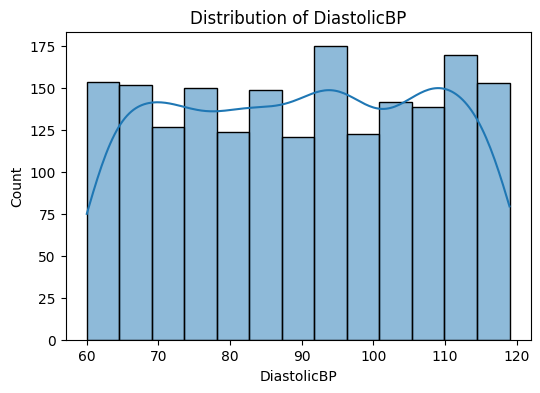

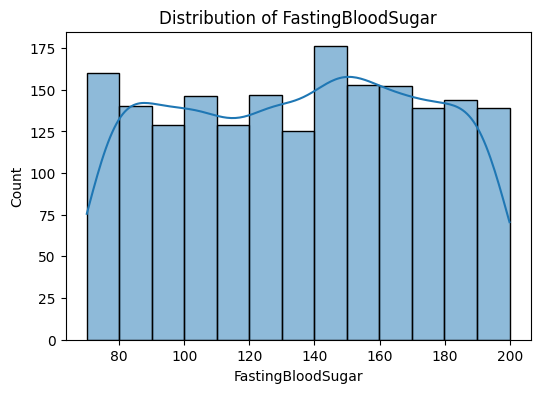

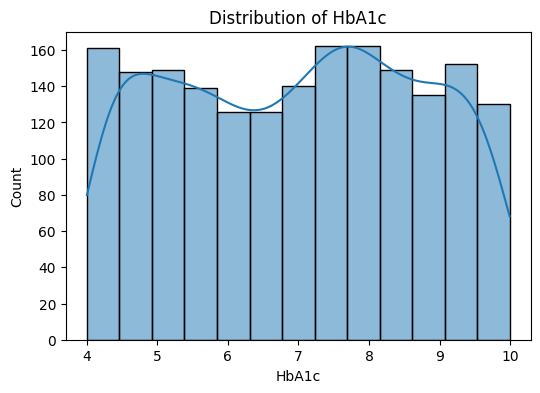

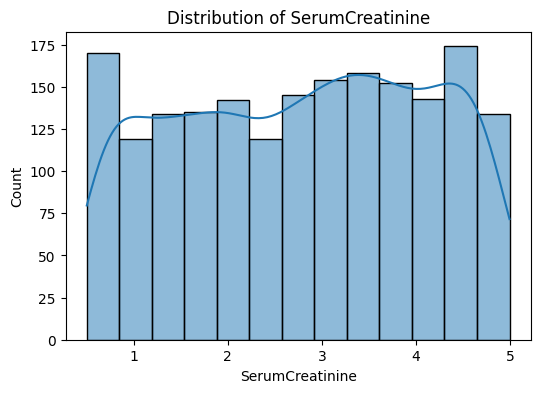

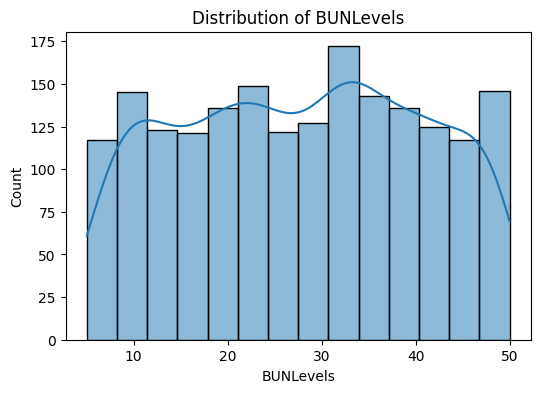

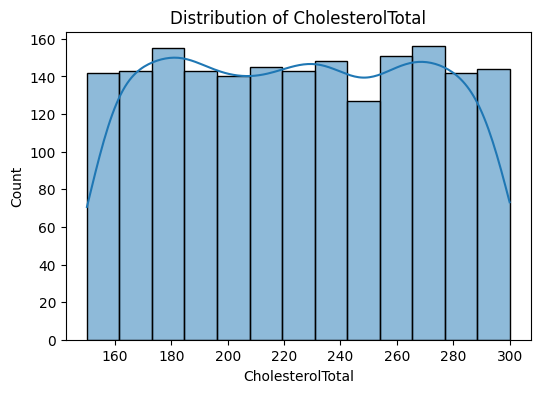

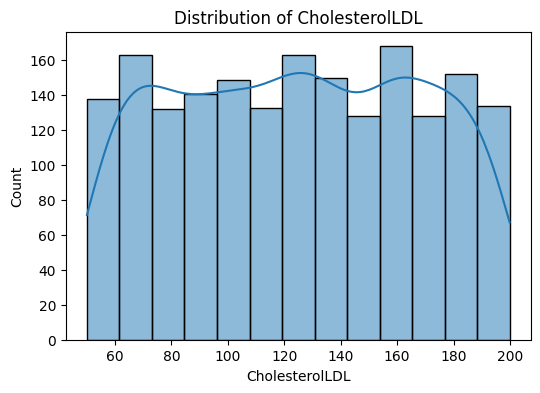

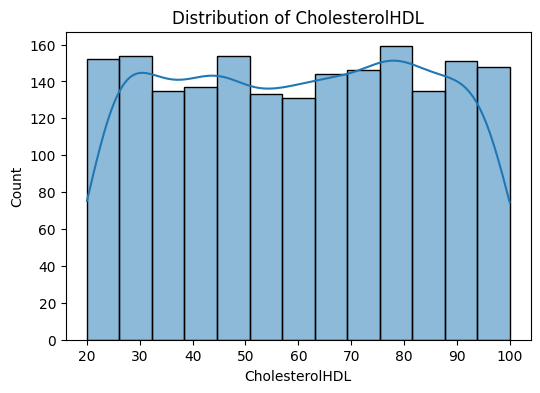

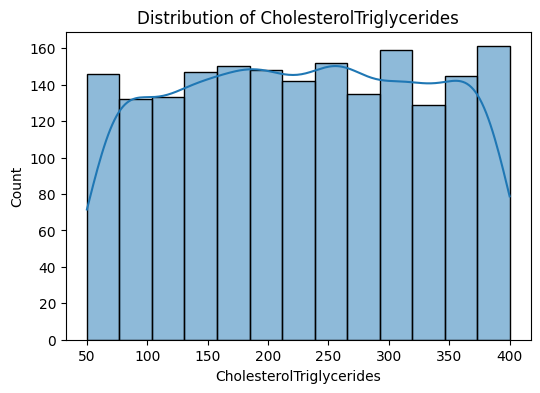

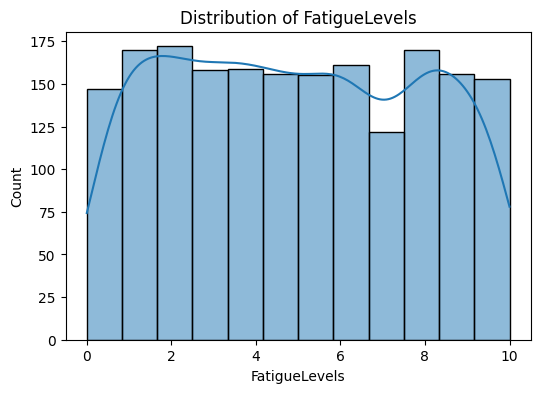

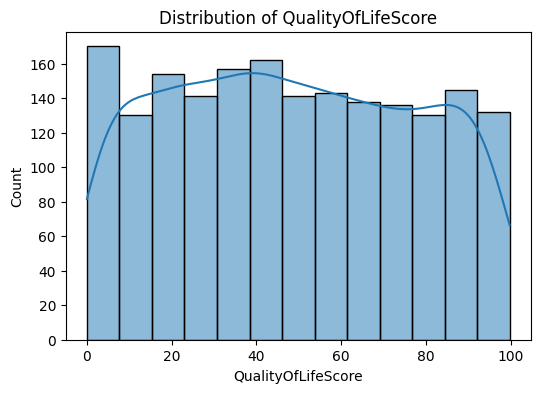

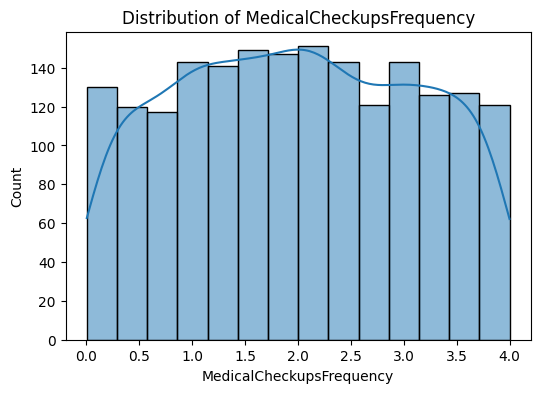

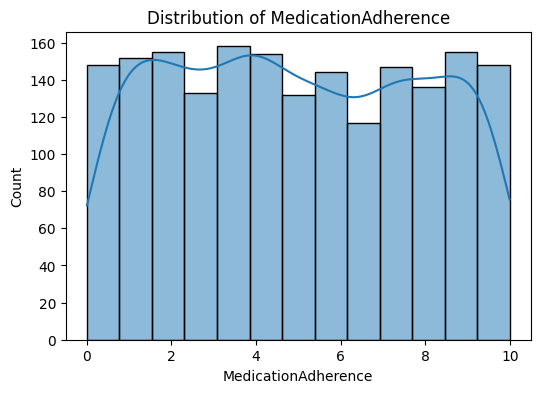

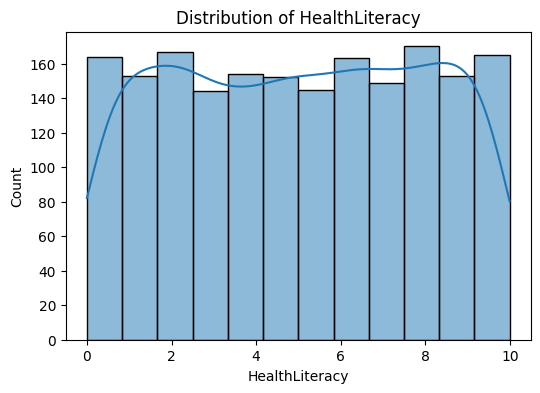

In [39]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(db[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

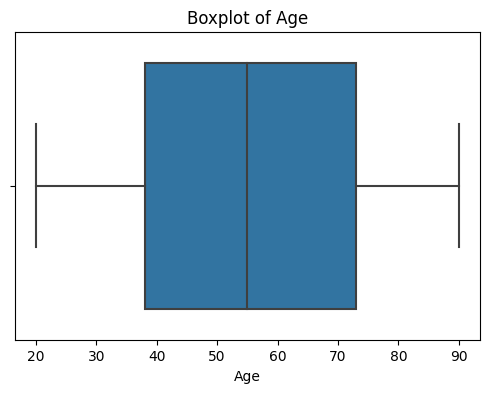

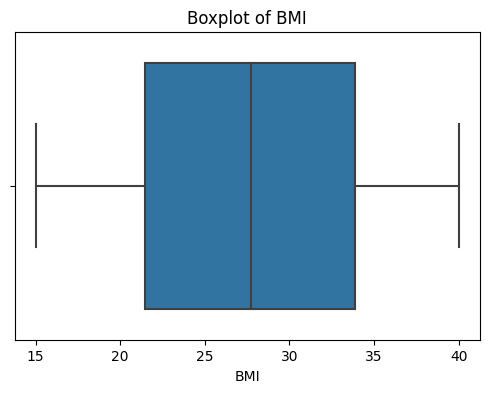

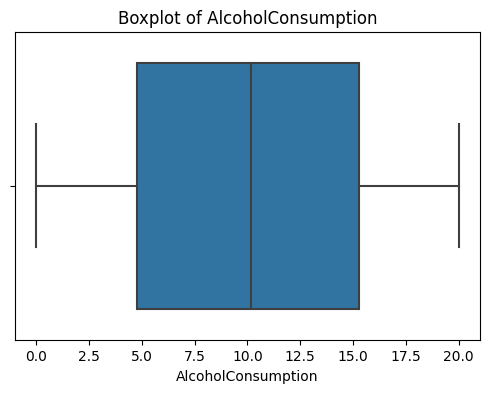

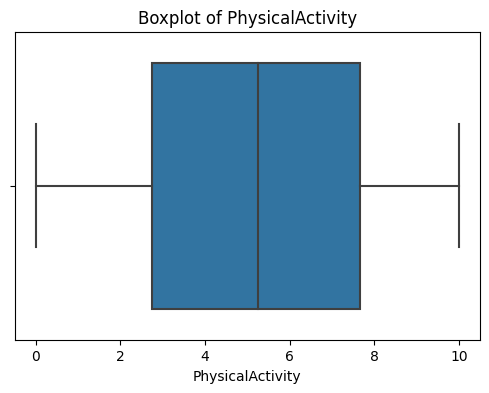

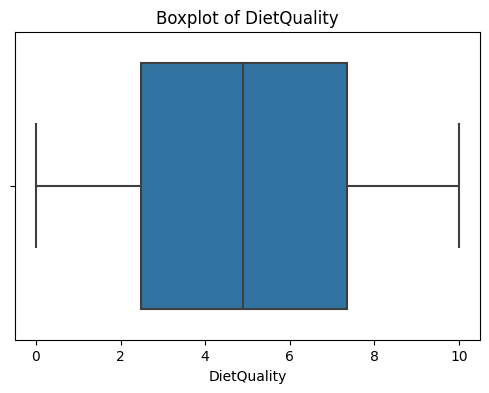

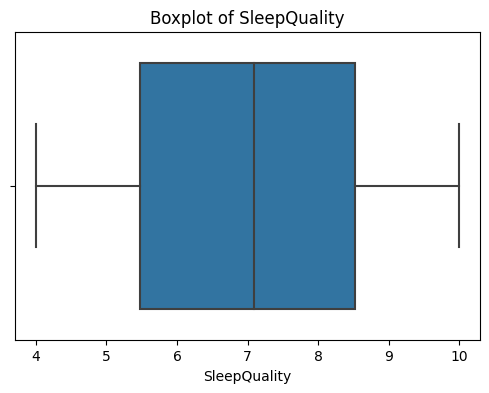

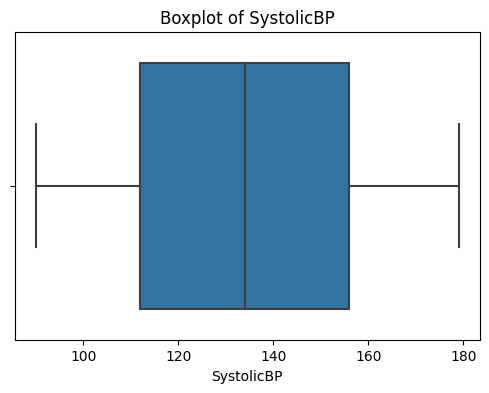

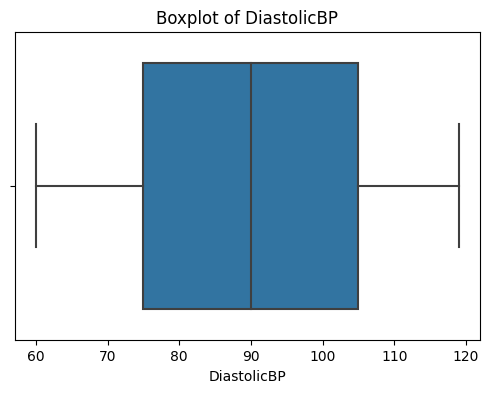

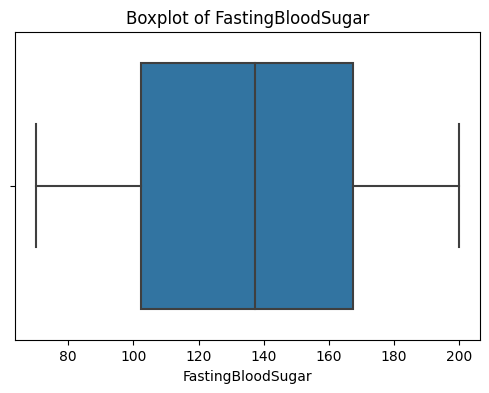

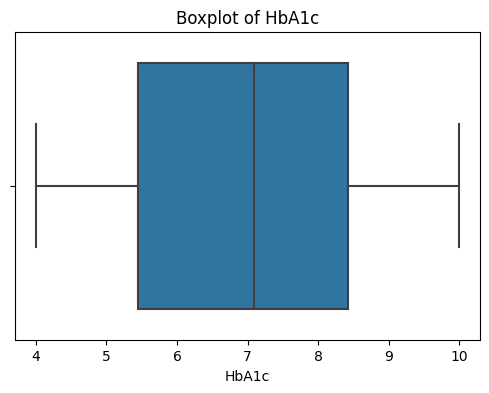

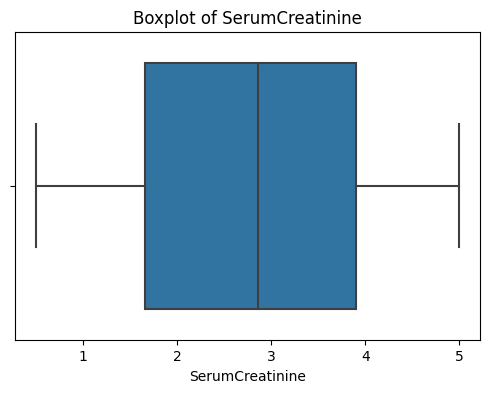

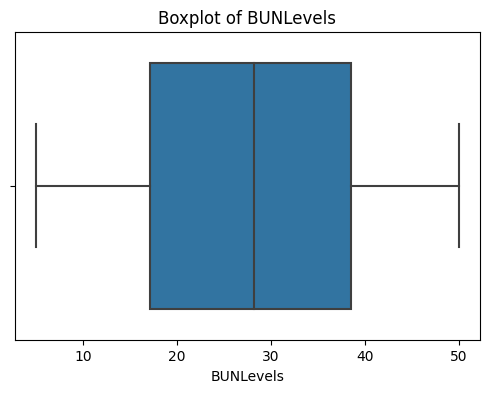

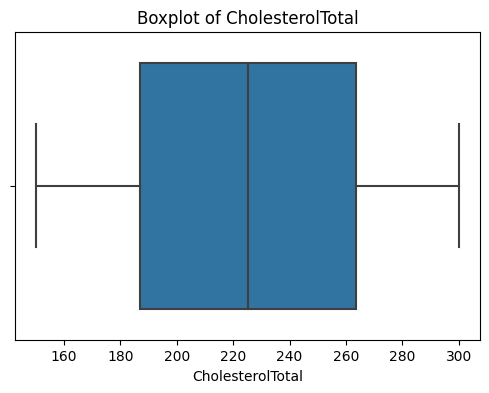

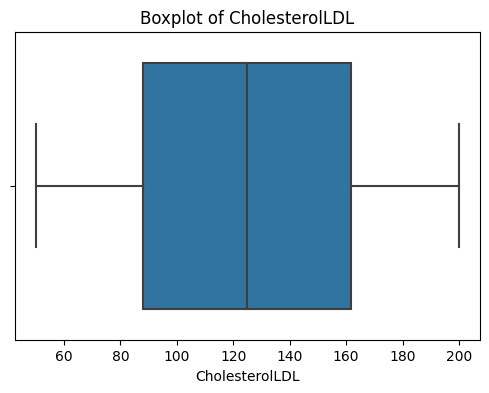

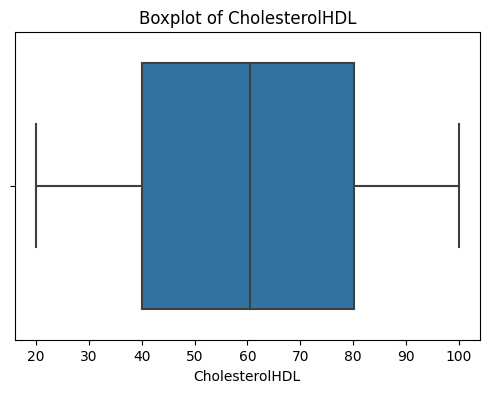

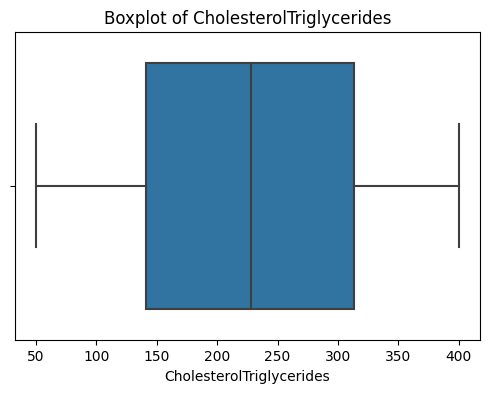

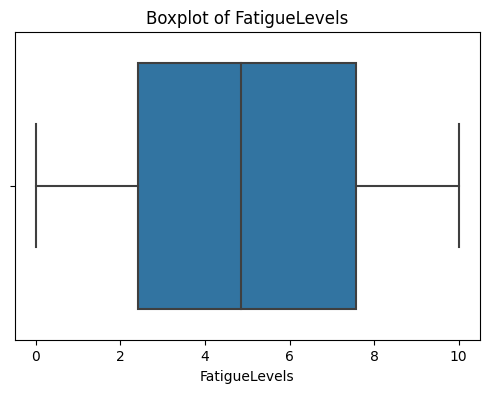

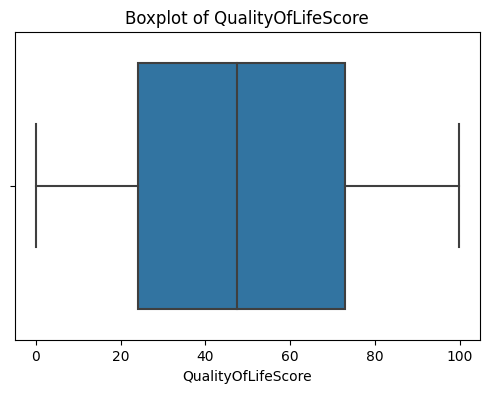

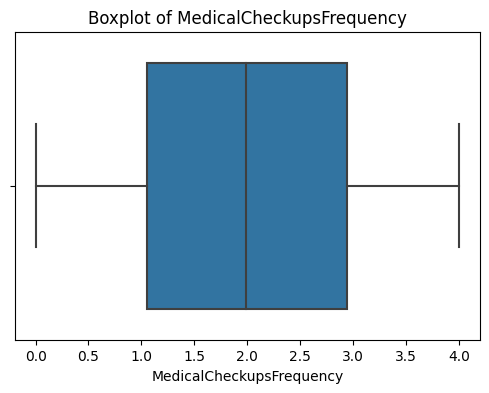

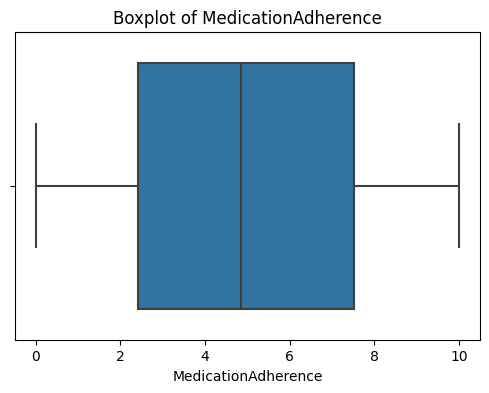

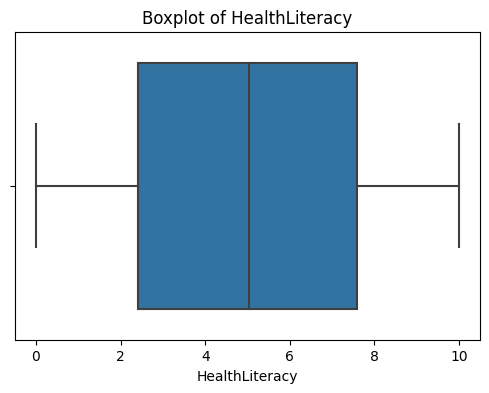

In [40]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=db, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


In [38]:
categorical_num_cols = [col for col in db.select_dtypes(include=['int64', 'float64']).columns
                        if db[col].nunique() <= 10 and col != 'Diagnosis']

print(f"Categorical columns stored as numeric ({len(categorical_num_cols)}):")
print(categorical_num_cols)


Categorical columns stored as numeric (22):
['Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'Smoking', 'FamilyHistoryDiabetes', 'GestationalDiabetes', 'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension', 'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications', 'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss', 'BlurredVision', 'SlowHealingSores', 'TinglingHandsFeet', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality']


In [47]:
# Compute correlation on numeric columns in the original DataFrame
corr_matrix = db.select_dtypes(include=['int64', 'float64']).corr()


# Plot the heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features in db)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [46]:
correlation_with_target = corr_matrix['Diagnosis'].drop('Diagnosis')

correlation_with_target_df = correlation_with_target.to_frame().reset_index()
correlation_with_target_df.columns = ['Feature', 'Correlation with Diagnosis']

print(correlation_with_target_df)

                          Feature  Correlation with Diagnosis
0                             Age                   -0.016864
1                          Gender                    0.011746
2                       Ethnicity                   -0.023132
3             SocioeconomicStatus                    0.025572
4                  EducationLevel                   -0.002306
5                             BMI                    0.014586
6                         Smoking                    0.053829
7              AlcoholConsumption                   -0.009671
8                PhysicalActivity                   -0.006413
9                     DietQuality                   -0.041432
10                   SleepQuality                   -0.002938
11          FamilyHistoryDiabetes                    0.047681
12            GestationalDiabetes                    0.029610
13        PolycysticOvarySyndrome                    0.038803
14            PreviousPreDiabetes                   -0.011025
15      

In [69]:
correlation_threshold = 0.05 # define the correlation threshold below which features will be dropped

strong_correlations = correlation_with_target[abs(correlation_with_target) >= correlation_threshold]

features_to_keep = strong_correlations.index.tolist()

db_filtered = db[features_to_keep + ['Diagnosis']]

db_filtered.head()

,Smoking,Hypertension,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,FrequentUrination,ExcessiveThirst,UnexplainedWeightLoss,Diagnosis
0,1,0,93,73,163.687162,9.283631,0,0,0,1
1,0,0,165,99,188.347070,7.326870,0,0,0,1
2,0,0,119,91,127.703653,4.083426,0,0,0,0
3,1,0,169,87,82.688415,6.516645,0,0,0,0
4,0,0,165,69,90.743395,5.607222,0,0,0,0


In [70]:
selected = ['Hypertension', 'SystolicBP', 'DiastolicBP']
corr_subset = db[selected].corr()

print("\n🔗 Correlation Matrix:")
print(corr_subset)



🔗 Correlation Matrix:
              Hypertension  SystolicBP  DiastolicBP
Hypertension      1.000000   -0.049358     0.018867
SystolicBP       -0.049358    1.000000     0.001470
DiastolicBP       0.018867    0.001470     1.000000


we can keep all 3

In [77]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


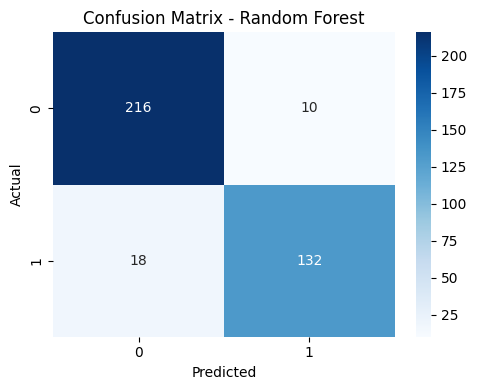

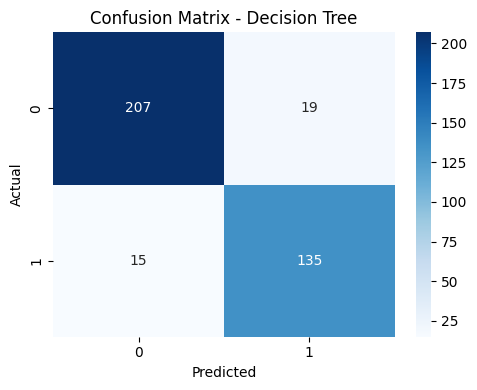

c:\Users\pascal\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:00:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


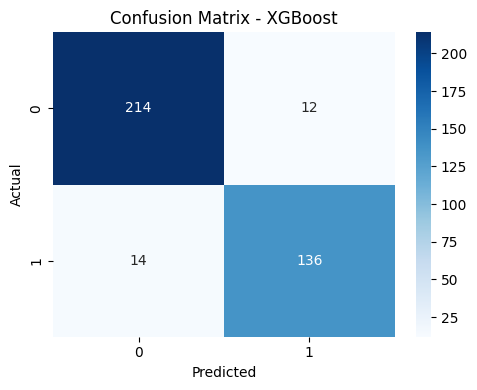

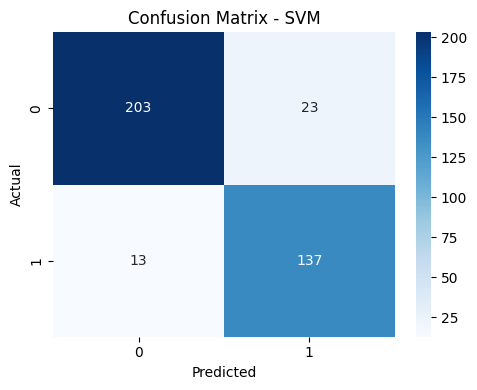

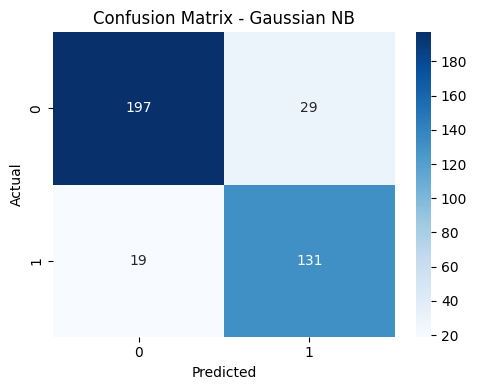

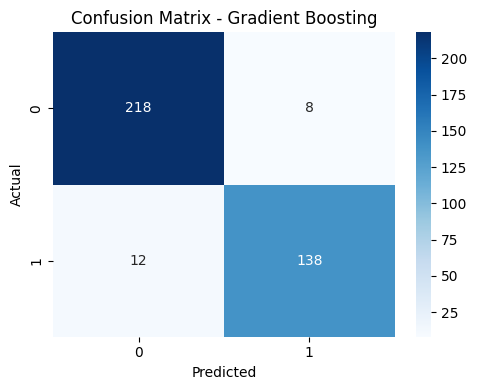


Model Performance Comparison:

               Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
5  Gradient Boosting    0.9468     0.9452  0.9200    0.9324   0.9606
2            XGBoost    0.9309     0.9189  0.9067    0.9128   0.9559
0      Random Forest    0.9255     0.9296  0.8800    0.9041   0.9524
1      Decision Tree    0.9096     0.8766  0.9000    0.8882   0.9080
3                SVM    0.9043     0.8562  0.9133    0.8839   0.9406
4        Gaussian NB    0.8723     0.8188  0.8733    0.8452   0.9213


In [83]:

# ========== Split data ==========
X = db_filtered.drop('Diagnosis', axis=1)
y = db_filtered['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ========== Preprocessing ==========
scaler = ColumnTransformer(
    transformers=[('num', StandardScaler(), X.columns)],
    remainder='passthrough'
)

# ========== Classifiers ==========
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('SVM', SVC(probability=True, random_state=42)),
    ('Gaussian NB', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# ========== Results container ==========
results = {
    'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [],
    'F1 Score': [], 'ROC AUC': []
}

trained_models = []

# ========== Loop and evaluate ==========
for name, clf in models:
    pipe = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('scaler', scaler),
        ('clf', clf)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else None

    results['Model'].append(name)
    results['Accuracy'].append(round(accuracy_score(y_test, y_pred), 4))
    results['Precision'].append(round(precision_score(y_test, y_pred), 4))
    results['Recall'].append(round(recall_score(y_test, y_pred), 4))
    results['F1 Score'].append(round(f1_score(y_test, y_pred), 4))
    results['ROC AUC'].append(round(roc_auc_score(y_test, y_proba), 4) if y_proba is not None else 'N/A')


    trained_models.append((name, pipe))  # ✅ Save trained model with its name

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# ========== Show results ==========
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:\n")
print(results_df.sort_values(by='Accuracy', ascending=False))


In [84]:
import os, pickle, joblib

In [85]:
# Get the best model name
best_index = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_index, 'Model']
print(f"\n✅ Best Model (based on Accuracy): {best_model_name}")
print(results_df.loc[best_index])  # See all metrics


✅ Best Model (based on Accuracy): Gradient Boosting
Model        Gradient Boosting
Accuracy                0.9468
Precision               0.9452
Recall                    0.92
F1 Score                0.9324
ROC AUC                 0.9606
Name: 5, dtype: object


In [87]:
# Retrieve the trained pipeline
best_pipeline = next(pipe for name, pipe in trained_models if name == best_model_name)

# Save it
model_name_safe = best_model_name.replace(" ", "_").lower()
save_path = r"C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\models"
os.makedirs(save_path, exist_ok=True)

In [88]:
# Save it
model_name_safe = best_model_name.replace(" ", "_").lower()
save_path = r"C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\models"
os.makedirs(save_path, exist_ok=True)

# Joblib
joblib_path = os.path.join(save_path, f"{model_name_safe}_model_diabetes.joblib")
joblib.dump(best_pipeline, joblib_path)

# Pickle
pickle_path = os.path.join(save_path, f"{model_name_safe}_model_diabetes.pkl")
with open(pickle_path, 'wb') as f:
    pickle.dump(best_pipeline, f)

print(f"\n✅ Saved best model as:\n→ Joblib: {joblib_path}\n→ Pickle: {pickle_path}")


✅ Saved best model as:
→ Joblib: C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\models\gradient_boosting_model_diabetes.joblib
→ Pickle: C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\models\gradient_boosting_model_diabetes.pkl


In [89]:
# Load the saved model (choose joblib or pickle, not both)
model_path = r"C:\Users\pascal\Desktop\PROJECTS 2025\Multi-disease prediction models\multi-health-ml-predictor\models\gradient_boosting_model_diabetes.joblib"
model = joblib.load(model_path)

In [90]:
sample_data = {
    'Smoking': 0,
    'Hypertension': 1,
    'SystolicBP': 140,
    'DiastolicBP': 90,
    'FastingBloodSugar': 130,
    'HbA1c': 7.5,
    'FrequentUrination': 1,
    'ExcessiveThirst': 1,
    'UnexplainedWeightLoss': 0
    # Include only the features you used after correlation filtering
}


In [91]:
def predict_diabetes(model, input_dict):
    df = pd.DataFrame([input_dict])
    proba = model.predict_proba(df)[0][1]
    pred = model.predict(df)[0]
    result = 'Diabetes' if pred == 1 else 'No Diabetes'

    print(f"\n🔍 Prediction: {result}")
    print(f"🧪 Probability: {round(proba, 4)}")
    return pred, proba

In [92]:
predict_diabetes(model, sample_data)



🔍 Prediction: Diabetes
🧪 Probability: 0.9929


(1, 0.992948705705597)